# Enunciado

Plantea el problema anterior con un modelo de regresión usando KNN. En el vídeo 7 hay un ejemplo de regresión con KNN.

In [39]:
import pandas as pd

df = pd.read_csv('csv/winequality-red.csv')
df.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
              'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
              'quality']
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Entrenamientos y test

In [40]:
from sklearn.model_selection import train_test_split

X = df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
              'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Regresión

In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

reg = KNeighborsRegressor(n_neighbors=5, weights='distance')
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Error cuadrático medio: ', mean_squared_error(y_test, y_pred))

Error cuadrático medio:  0.5229383660557013


## Resultados

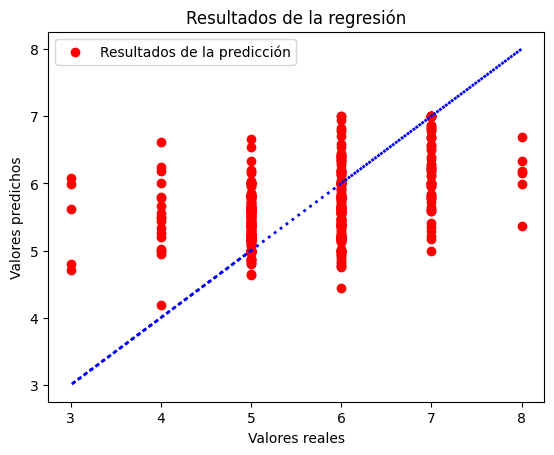

In [42]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='red', label='Resultados de la predicción')
plt.title('Resultados de la regresión')
plt.plot(y_test, y_test, color='blue', linewidth=2, linestyle='dotted')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.legend()
plt.show()